In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [52]:
df = pd.read_json('output/train_output.jsonl', lines=True)
df.head(1)

,left,right,label,match,match_confidence
0,COL name VAL sony pink cyber-shot 7.2 megapixe...,COL name VAL olympus fe-360 digital camera pin...,0,1,0.406435


In [53]:
print(classification_report(df['label'], df['match'], zero_division=0))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1710
           1       0.19      0.45      0.27       206

    accuracy                           0.73      1916
   macro avg       0.56      0.61      0.55      1916
weighted avg       0.84      0.73      0.78      1916



In [57]:
for level in range(0, 100, 5):
    print(f'Samples < {level}% confidence:', (df['match_confidence'] < level/100).sum())

Samples < 0% confidence: 0
Samples < 5% confidence: 27
Samples < 10% confidence: 40
Samples < 15% confidence: 64
Samples < 20% confidence: 100
Samples < 25% confidence: 141
Samples < 30% confidence: 197
Samples < 35% confidence: 310
Samples < 40% confidence: 1427
Samples < 45% confidence: 1845
Samples < 50% confidence: 1904
Samples < 55% confidence: 1913
Samples < 60% confidence: 1915
Samples < 65% confidence: 1916
Samples < 70% confidence: 1916
Samples < 75% confidence: 1916
Samples < 80% confidence: 1916
Samples < 85% confidence: 1916
Samples < 90% confidence: 1916
Samples < 95% confidence: 1916


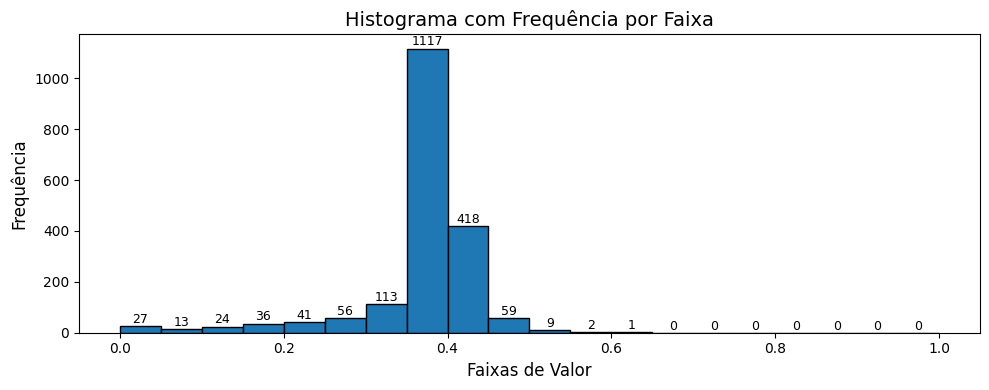

In [55]:
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(df['match_confidence'], bins=np.arange(0, 1.05, 0.05), edgecolor='black')

# Adicionando rótulos de frequência em cada barra
for count, patch in zip(n, patches):
    # Pega o centro da barra
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.text(x, y + 0.5, int(count), ha='center', va='bottom', fontsize=9)

# Personalizando o gráfico
ax.set_title('Histograma com Frequência por Faixa', fontsize=14)
ax.set_xlabel('Faixas de Valor', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
plt.tight_layout()
plt.show()

In [56]:
confidence = 95
df[df['match_confidence'] >= confidence/100].to_json(f'output/mte{confidence}.jsonl', orient='records', lines=True)
df[df['match_confidence'] < confidence/100].to_json(f'output/lt{confidence}.jsonl', orient='records', lines=True)